## MACS 30267 Final
Maha Adil, Angel Westbrook, Jason Gordon

[Intro to final]

In [3]:
## Setup
import pandas as pd
import numpy as np
import re

#%pip install nltk # This is a natural language processing package so I can stem words/remove stopwords/etc.
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
nltk.download("punkt")

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from nltk import FreqDist # FreqDist = count frequency of words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
sentiment = pd.read_csv("Data/nltk_split.csv")

In [5]:
sentiment.info()
# Not many non-null for coordinates. Should prolly kill that. Also not sure what the unnamed ones are.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163669 entries, 0 to 163668
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0.2     163669 non-null  int64  
 1   Unnamed: 0.1     163669 non-null  int64  
 2   Unnamed: 0       163669 non-null  int64  
 3   id               163669 non-null  float64
 4   text             163669 non-null  object 
 5   favorite_count   163669 non-null  int64  
 6   retweet_count    163669 non-null  int64  
 7   created_at       163669 non-null  object 
 8   coordinates      43 non-null      object 
 9   score            163669 non-null  object 
 10  neg              163669 non-null  float64
 11  neu              163669 non-null  float64
 12  pos              163669 non-null  float64
 13  compound         163669 non-null  float64
 14  created_at_date  163669 non-null  object 
 15  Unnamed: 15      0 non-null       float64
 16  Unnamed: 16      0 non-null       floa

In [6]:
# Cutting the data to what I need!
data = sentiment[["id", "text", "favorite_count", "retweet_count", "created_at", "coordinates", "score", "neg", "neu", "pos", "compound", "created_at_date"]]
data

,id,text,favorite_count,retweet_count,created_at,coordinates,score,neg,neu,pos,compound,created_at_date
0,1.030000e+18,Gotta love the facts. https://t.co/bZ2G8AZuo9,0,0,2018-08-13 10:40:21+00:00,NaN,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.000,0.488,0.512,0.6369,8/13/2018
1,1.030000e+18,RT @ToolangiForest: A great day of action for ...,0,35,2018-08-13 10:40:10+00:00,NaN,"{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...",0.000,0.651,0.349,0.8805,8/13/2018
2,1.030000e+18,@jonkudelka Harvey Norman reckons climate chan...,2,0,2018-08-13 10:40:43+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,8/13/2018
3,1.030000e+18,RT @jayrosen_nyu: Why does skepticism about im...,0,52,2018-08-13 10:40:43+00:00,NaN,"{'neg': 0.146, 'neu': 0.62, 'pos': 0.234, 'com...",0.146,0.620,0.234,0.5267,8/13/2018
4,1.030000e+18,RT @FranceinIreland: On 5th November we call a...,0,16,2018-08-13 10:41:58+00:00,NaN,"{'neg': 0.095, 'neu': 0.657, 'pos': 0.248, 'co...",0.095,0.657,0.248,0.4939,8/13/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
163664,9.220000e+17,#RRN https://t.co/9DTuWYbyzn E.P.A. Cancels Ta...,0,0,2017-10-23 12:31:37+00:00,NaN,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...",0.160,0.840,0.000,-0.2263,10/23/2017
163665,9.220000e+17,RT @TIME: The EPA has pulled its scientists fr...,0,78,2017-10-23 12:50:34+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017
163666,9.220000e+17,RT @cathmckenna: We must all take action on #C...,0,21,2017-10-23 15:10:36+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017
163667,9.220000e+17,RT @TIME: The EPA has pulled its scientists fr...,0,125,2017-10-23 15:17:57+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017


## RQ1: Splitting words by sentiment groups; analyzing content

In [7]:
def clean_text(s) -> list:
    tokens = re.findall(r'\b\w+\b', s.lower()) # For the most part I'm looking to just shift everything to lowercase based on what we have here.

    cleaned = [] # Cleaned list (to put into the new column)
    for tok in tokens:
        # Removing stopwords and "twitter words", i.e., RT, @[name], http (links), co (end to link). These can clog up the actual analysis.
        # While it's not perfect since it can miss some things, this cleans it enough so that it won't be a bother to our analysis.
        if tok in stopwords:
            continue # SKIP!
        if re.match(r"^rt|@|http|co", tok):
            continue # Also skip
        
        stemmed = stemmer.stem(tok)
        cleaned.append(stemmed)
    return cleaned

data['stemmed_tokens'] = data['text'].apply(clean_text)

C:\Users\jason\AppData\Local\Temp\ipykernel_2976\3089879494.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemmed_tokens'] = data['text'].apply(clean_text)


In [8]:
all_tokens = [token for row in data['stemmed_tokens'] for token in row] # Get all tokens to run the FreqDist on
fdist = FreqDist(all_tokens)

In [9]:
postw = data[data['pos'] > 0.5] # Splitting by sentiment. Seemingly each tweet will have one and *only* one sentiment over 0.5.
neutw = data[data['neu'] > 0.5]
negtw = data[data['neg'] > 0.5]

In [10]:
pos_tokens = [token for row in postw['stemmed_tokens'] for token in row] # Freq Dists for the above.
pos_freq = FreqDist(pos_tokens)

neu_tokens = [token for row in neutw['stemmed_tokens'] for token in row]
neu_freq = FreqDist(neu_tokens)

neg_tokens = [token for row in negtw['stemmed_tokens'] for token in row]
neg_freq = FreqDist(neg_tokens)

In [11]:
print(f"Positive Terms: {pos_freq.most_common(50)}")
print(f"Neutral Terms: {neu_freq.most_common(50)}")
print(f"Negative Terms: {neg_freq.most_common(50)}")

Positive Terms: [('global', 81), ('warm', 71), ('great', 61), ('thank', 48), ('love', 47), ('good', 47), ('ye', 45), ('wow', 40), ('climat', 34), ('energi', 30), ('lol', 29), ('respect', 29), ('like', 28), ('chang', 26), ('sure', 26), ('justic', 24), ('pleas', 23), ('share', 21), ('well', 20), ('ha', 19), ('pretti', 18), ('excel', 17), ('interest', 16), ('climatechang', 16), ('agre', 15), ('amp', 15), ('true', 15), ('read', 14), ('amaz', 14), ('help', 14), ('support', 13), ('opportun', 12), ('clean', 12), ('inspir', 12), ('god', 12), ('save', 12), ('nice', 12), ('awesom', 11), ('articl', 11), ('environ', 11), ('work', 11), ('healthi', 11), ('happi', 10), ('award', 10), ('join', 10), ('truth', 10), ('better', 10), ('win', 9), ('beauti', 9), ('question', 9)]
Neutral Terms: [('climat', 67557), ('chang', 60122), ('deal', 20400), ('climatechang', 17036), ('global', 14568), ('warm', 12210), ('year', 9043), ('amp', 8656), ('say', 8213), ('n', 7380), ('new', 6890), ('trump', 6770), ('wildfir',

## RQ2: Can we classify sentiment from ML techniques?

Idea: use the compound score (ranges from -1 to 1), and see if we can utilize the text column to predict in a classification pipeline.

In [23]:
# Library setup for NLP
import seaborn as sns # Mostly just for the distribution plot

from sklearn.pipeline import Pipeline # Need for a full workflow/cross-validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import r2_score, root_mean_squared_error # Need MSE for RMSE, R^2 clearly gets r-squared.

In [19]:
data['processed_text'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)) # Kinda annoying, but essentially making strongs from our cleaned lists.
X = data['processed_text'] #IV
y = data['compound'] # DV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, # Train set is 75%, test set is 25%.
                                                    random_state=123, shuffle=True) # Random seed for replication

pipe = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 1),
                             min_df=3, # Drop extremely low-use words
                             max_features=2000)),
    ('reg', Ridge()) # USing a Ridge regression instead of linear to allow for hyperparameter tuning
    ])


param_grid = { # For CV
    'reg__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

C:\Users\jason\AppData\Local\Temp\ipykernel_2976\236551756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)) # Kinda annoying, but essentially making strongs from our cleaned lists.


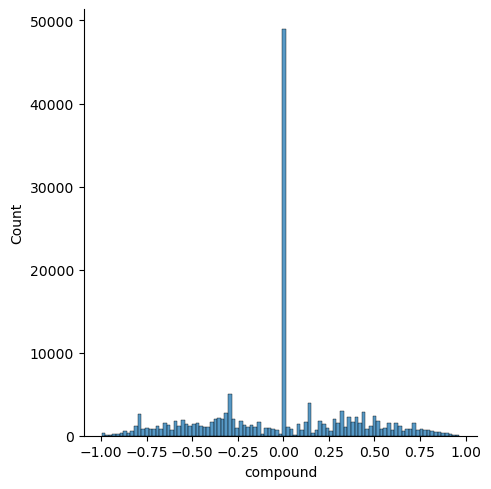

In [15]:
sns.displot(y) # Definitely skewed towards 0, but a bit of dissonance.

In [ ]:
# K-Fold Cross-Validation (Hoping to make it fit as well as it can)
kf = KFold(n_splits=5, shuffle=True, random_state=123) # keeping the seed the same for replication
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1, refit=True) # Refits pipeline on entire training set

grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_['reg__alpha'])
print("Best CV R² on training folds:", grid.best_score_)

Best alpha: 1.0
Best CV R² on train folds: 0.7139050188115361


In [ ]:
best_model = grid.best_estimator_ # Selects best grid based on the cross-validation
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Test  R²: {r2}")
print(f"Test RMSE: {rmse}")

Test  R²:   0.7172114415841832
Test RMSE:   0.21446462076161937


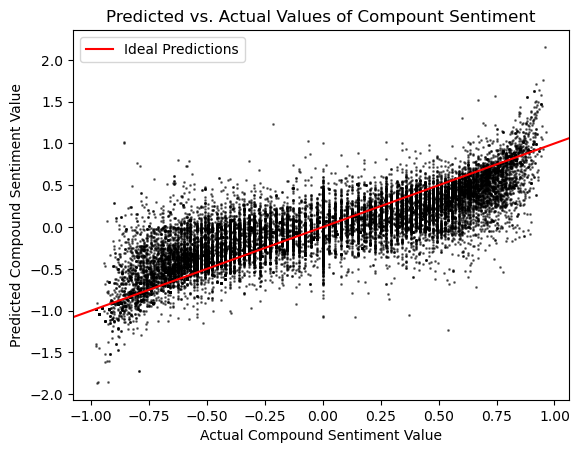

In [26]:
# Plotting
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, s=1, c='black', alpha=0.5)
plt.xlabel("Actual Compound Sentiment Value")
plt.ylabel("Predicted Compound Sentiment Value")
plt.title("Predicted vs. Actual Values of Compount Sentiment")
plt.axline((0, 0), slope=1, color='red', label='Ideal Predictions')
plt.legend()

## RQ3: What latent themes/topics exist in climate change discourse, and how do they align with sentiment?

In [33]:
## FreqTerms on entire dataset

## go by tweet/split and sum then? Might be useful?
# Average sentiment by term? <- This one!

## Identify SOME topics that come up in FreqTerms and then plot the counts of those on columns. Then do a weighted mean of the thing.



In [34]:
vect = CountVectorizer(min_df=5, max_features=2000)
X_train_counts = vect.fit_transform(X_train)
vocab = vect.vocabulary_ # Set vocabulary for my purposes here.

In [35]:
vect = pipe.named_steps['vect']
X_counts = vect.transform(data['processed_text'])   # sparse matrix shape (n_docs, n_terms)
terms = vect.get_feature_names_out()

# To see counts for doc #0:
row0 = X_counts[0].toarray().ravel()
doc0_counts = {term: row0[i] for i, term in enumerate(terms) if row0[i]>0}
print(doc0_counts)

NotFittedError: Vocabulary not fitted or provided